# XGBoost Used Cars

## Reading data and modeling

In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

cars = pd.read_csv('../datasets/used_cars_tratado.csv')

## Modeling

In [2]:
from sklearn.model_selection import train_test_split
X = cars.drop('Price', axis=1)
y = cars['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [3]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_estimator = xgb.XGBRegressor(random_state=2023)

params = {
    'n_estimators': [10, 50, 100], 'learning_rate': [0.05, 0.1, 0.3], 'max_depth': list(range(1,16))
}

grid = GridSearchCV(estimator=xgb_estimator,
                    param_grid=params,
                    cv=5,
                    n_jobs=5,
                    verbose=2)

grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

Fitting 5 folds for each of 135 candidates, totalling 675 fits


(0.9482115015219016,
 {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 100})

In [4]:
from sklearn import metrics
grid_predictions = grid.predict(X_test)

print('MAE: ', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE: ', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

MAE:  200046.5646419249
MSE:  353580343902.98236
RMSE:  594626.222010922


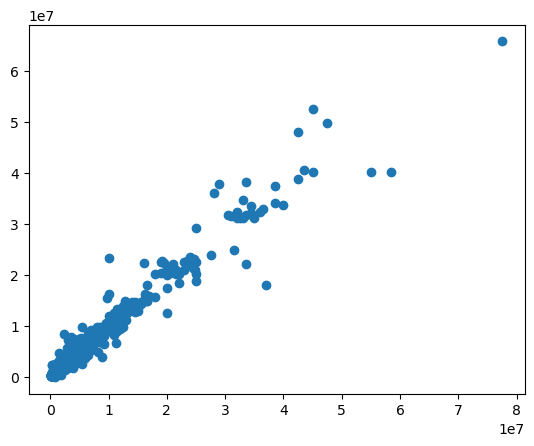

In [5]:
plt.scatter(y_test, grid_predictions)